## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold,cross_validate, cross_val_predict
from sklearn.utils import shuffle
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, recall_score, make_scorer, classification_report, confusion_matrix, ConfusionMatrixDisplay 


## Reading Data

In [2]:
df_dataset = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df_dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df_dataset.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
rows, cols = df_dataset.shape
print("Samples:", rows)
print("Features:", cols)

Samples: 2111
Features: 17


## Summary Statistics

In [6]:
# NaN values appear because describe(include='all') shows both numeric and categorical metrics, and non-applicable metrics are displayed as NaN.

df_dataset.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [7]:
# Checking the data types of each column to see which are numeric (float64) and which are categorical (object).

df_dataset.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

## Checking for Missing Values

In [8]:
df_dataset.isna().any()

# False indicates that no missing values exist in any column of the dataset
# As a result we have 0% missing values meaning all 2,111 samples have complete data across all 17 columns

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

## Targets and Features

In [9]:
# Define the target column and use all remaining columns as features.

target = "NObeyesdad"
features = [col for col in df_dataset.columns if col != target]

print("Target:", target)
print("Features:", features)

Target: NObeyesdad
Features: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']


## Data Type Classification of Dataset Features

In [10]:
# Manually grouping features into continuous, ordinal, binary, and nominal categories for preprocessing.

continuous = ["Age", "Height", "Weight"]
ordinal_numeric = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]
binary_categorical = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]
nominal_categorical = ["Gender", "MTRANS"]
ordinal_categorical = ["CAEC", "CALC", "NObeyesdad"]

print("Συνεχή ποσοτικά χαρακτηριστικά (continuous):")
print(continuous, "\n")

print("Διακριτά αριθμητικά χαρακτηριστικά (ordinal discrete):")
print(ordinal_numeric, "\n")

print("Δυαδικά κατηγορικά χαρακτηριστικά (binary categorical):")
print(binary_categorical, "\n")

print("Ονομαστικά κατηγορικά χαρακτηριστικά (nominal categorical):")
print(nominal_categorical, "\n")

print("Διατεταγμένα κατηγορικά χαρακτηριστικά (ordinal categorical):")
print(ordinal_categorical)


Συνεχή ποσοτικά χαρακτηριστικά (continuous):
['Age', 'Height', 'Weight'] 

Διακριτά αριθμητικά χαρακτηριστικά (ordinal discrete):
['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] 

Δυαδικά κατηγορικά χαρακτηριστικά (binary categorical):
['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'] 

Ονομαστικά κατηγορικά χαρακτηριστικά (nominal categorical):
['Gender', 'MTRANS'] 

Διατεταγμένα κατηγορικά χαρακτηριστικά (ordinal categorical):
['CAEC', 'CALC', 'NObeyesdad']


## Feature Selection

Feature importance based on Mutual Information:
                               Feature  MI Score
2                               Weight  1.253920
0                                  Age  0.585630
1                               Height  0.424363
3                                 FCVC  0.382085
5                                 CH2O  0.301231
6                                  FAF  0.297199
7                                  TUE  0.267111
4                                  NCP  0.256571
8                          Gender_Male  0.187030
9   family_history_with_overweight_yes  0.138844
12                      CAEC_Sometimes  0.133687
11                     CAEC_Frequently  0.122342
17                      CALC_Sometimes  0.090524
18                             CALC_no  0.083557
10                            FAVC_yes  0.066176
21        MTRANS_Public_Transportation  0.039724
15                             SCC_yes  0.029264
14                           SMOKE_yes  0.025176
19                   

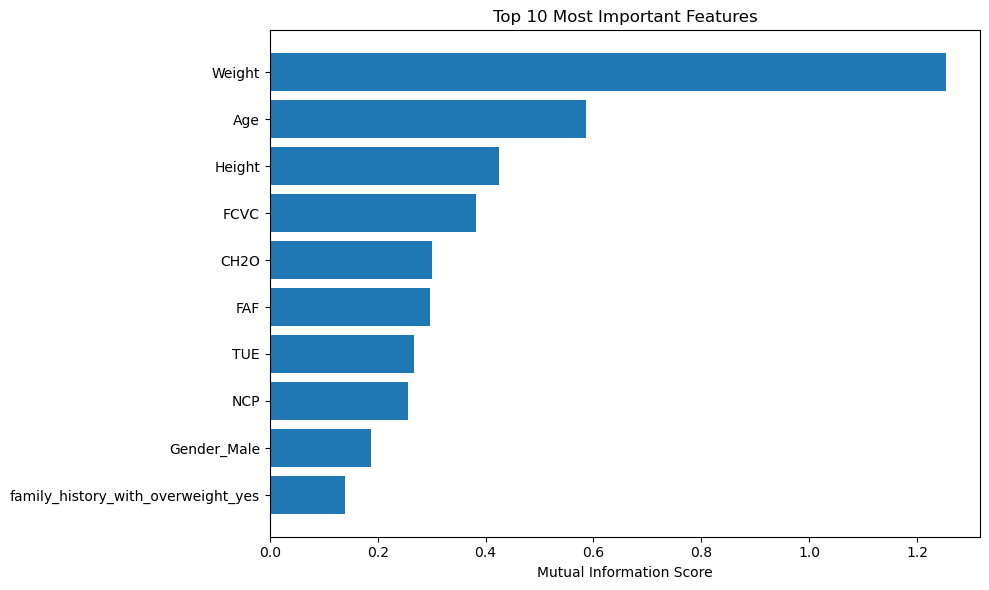

In [11]:
# Copy the dataset
df = df_dataset.copy()

# Encode target to numeric classes
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate X (features) and y (target)
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=0)

# Create a sorted table of feature importance
mi_results = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
})

mi_results = mi_results.sort_values(by='MI Score', ascending=False)

print("Feature importance based on Mutual Information:")
print(mi_results)

#top Top 10 Most Important Features visualization
mi_results_top10 = mi_results.head(10)
mi_results_top10 = mi_results_top10.iloc[::-1]
plt.figure(figsize=(10, 6))
plt.barh(mi_results_top10['Feature'], mi_results_top10['MI Score'])
plt.xlabel('Mutual Information Score')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

## Data transformation

In [12]:
# Makes a copy of the dataset
df = df_dataset.copy()

In [13]:
#  Define the target column
target_col = "NObeyesdad"

# Define categorical columns by type
ordinal_cols = ["CAEC", "CALC"]
onehot_cols = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "MTRANS"]


# Define the order of ordinal categories
ordinal_categories = [
    ["no", "Sometimes", "Frequently", "Always"],  # CAEC
    ["no", "Sometimes", "Frequently", "Always"],  # CALC
]

# Define obesity order for encoding target
obesity_order = [["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]]


## ColumnTransformer Encoding

In [14]:
# Identify numeric columns
# Numeric columns (everything else except target + the 2 ordinal + the one-hot cols)
numeric_cols = [c for c in df.columns if c not in [target_col] + ordinal_cols + onehot_cols]

# Create the encoders needed for each type of categorical data
# ord_enc: converts ordered categories (e.g., "no" < "Sometimes" < "Always") into integer levels 1, 2, 3, …
ord_enc = OrdinalEncoder(categories=ordinal_categories, dtype=int)

# onehot_enc: converts nominal categories (no inherent order) into one-hot binary features (e.g., Gender → Male=0/1, Female=0/1)
onehot_enc = OneHotEncoder() 

# y_encoder: encodes the target variable (obesity levels) using the predefined medical order of obesity classes.
y_encoder = OrdinalEncoder(categories=obesity_order, dtype=int) 

# Build ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("ord", ord_enc, ordinal_cols),        # CAEC, CALC → 1..4
        ("onehot", onehot_enc, onehot_cols),  # Gender, SMOKE,etc
        ("num", "passthrough", numeric_cols), # Age, Height, Weight, FCVC, ...
    ]
)

## Apply Preprocessing & Scaling

In [15]:
# Prepare raw X and y
X_raw = df.drop(columns=[target_col]) # Remove the target column and keep only features
y_raw = df[[target_col]] # Keep target column as a dataframe


In [16]:
# Transform features and target
X = preprocess.fit_transform(X_raw) # Apply preprocessing pipeline (fit + transform)
y = y_encoder.fit_transform(y_raw).ravel() + 1   # 1..7 instead of 0..6

#print shape of feature matrix and target vector
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2111, 25)
y shape: (2111,)


In [17]:
# Standardize the numeric data
# Create a StandardScaler (mean=0, std=1)
scaler = StandardScaler()

In [18]:
# Convert Pandas dataframes to Numpy arrays
np_data = np.array(X) # Convert preprocessed features to NumPy array
np_targets = np.array(y)# Convert encoded labels to NumPy array

In [19]:
# Fit scaler on the data and apply standardization
np_data = scaler.fit_transform(np_data)

## Model Definitions & Evaluation Metrics

In [20]:
model = AdaBoostClassifier()
#model = RandomForestClassifier(n_estimators=200)
#model = HistGradientBoostingClassifier()

In [21]:
model

AdaBoostClassifier()

In [22]:
# Define a macro-averaged specificity function for multiclass classification

def specificity_macro(y_true, y_pred):
# We compute specificity for each class by temporarily converting the
# multiclass labels into a binary format (one-vs-rest).
# For each class: samples of that class are labeled as 0 (positive class), all other samples are labeled as 1 (negative class)
# Specificity is equivalent to the recall of the negative class:
# specificity = TN / (TN + FP)
# After computing specificity for each class, we return the macro-average.
   
    classes = np.unique(y_true) # get all unique class labels
    specs = []                  # list to store specificity per class

    for c in classes:
        # 1 = "not class c" (negative), 0 = "class c" (positive)
        y_true_bin = (y_true != c).astype(int)
        y_pred_bin = (y_pred != c).astype(int)

        # recall of negative class = specificity
        spec_c = recall_score(y_true_bin, y_pred_bin, pos_label=1)
        specs.append(spec_c)

    return float(np.mean(specs))

specificity_scorer = make_scorer(specificity_macro)

In [23]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [24]:
# Create models to compare
models = {
"RandomForest": RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1),
"AdaBoost": AdaBoostClassifier(n_estimators=200,random_state=42),
"HistGradientBoosting": HistGradientBoostingClassifier(random_state=42),
}

# Define metrics for cross-validation
scoring = {
'accuracy': 'accuracy',
'recall_macro': 'recall_macro',          # sensitivity (macro)
'specificity_macro': specificity_scorer  # our custom specificity
}

results = {}

for name, model in models.items():
    print(f"\n=== {name} ===")
    scores = cross_validate(
        model,
        np_data,        # or X
        np_targets,     # or y
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )

    acc = scores['test_accuracy'].mean()
    sens = scores['test_recall_macro'].mean()
    spec = scores['test_specificity_macro'].mean()

    results[name] = (acc, sens, spec)

    print(f"Mean accuracy:    {acc:.4f}")
    print(f"Mean sensitivity: {sens:.4f}")
    print(f"Mean specificity: {spec:.4f}")


=== RandomForest ===
Mean accuracy:    0.9469
Mean sensitivity: 0.9457
Mean specificity: 0.9912

=== AdaBoost ===
Mean accuracy:    0.4543
Mean sensitivity: 0.4622
Mean specificity: 0.9089

=== HistGradientBoosting ===
Mean accuracy:    0.9777
Mean sensitivity: 0.9774
Mean specificity: 0.9963


## Comparison models visualization

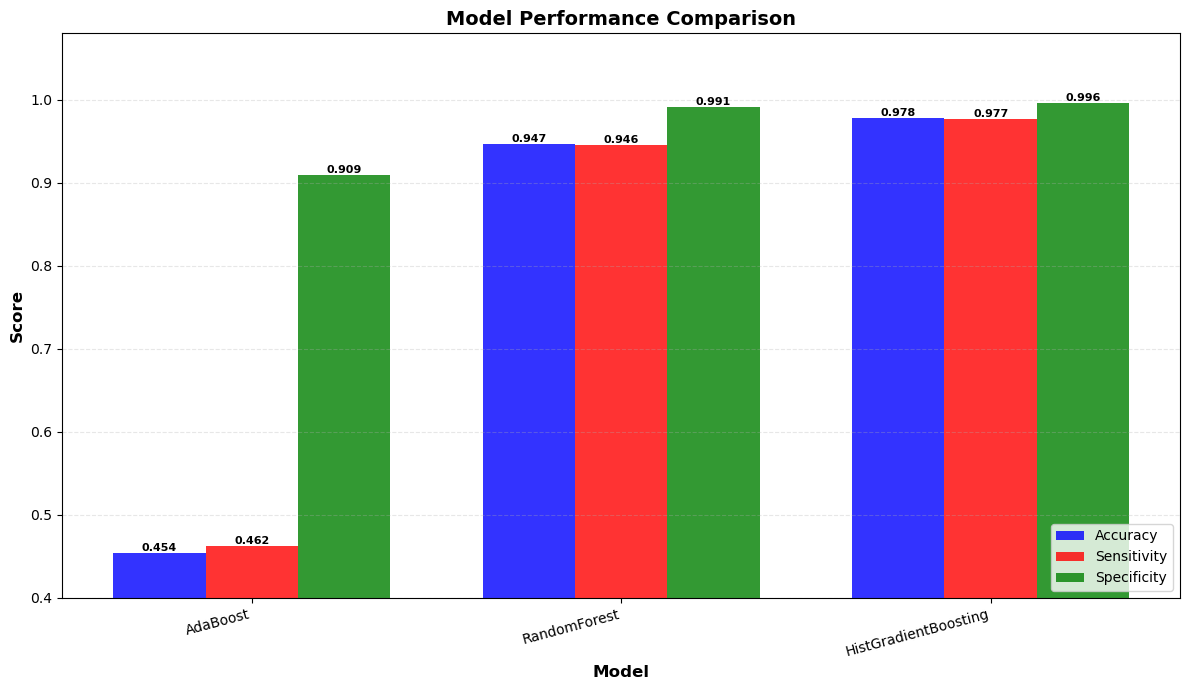


MODEL PERFORMANCE SUMMARY
Model Accuracy Sensitivity Specificity
----------------------------------------------------------------------
AdaBoost 0.4542788160600912 0.4621549769333021 0.908902653124916
RandomForest 0.9469462577125995 0.9456916336719294 0.9912091619111738
HistGradientBoosting 0.9777385316999017 0.9773675530818388 0.996297977673143


In [25]:
# Extract all metrics from results
models_list = ['AdaBoost', 'RandomForest', 'HistGradientBoosting']
accuracies = [results[m][0] for m in models_list]
sensitivities = [results[m][1] for m in models_list]
specificities = [results[m][2] for m in models_list]

# Set up the bar positions
x = np.arange(len(models_list))
width = 0.25  # Width of bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Create bars for each metric
bars1 = ax.bar(x - width, accuracies, width, label='Accuracy', color='blue', alpha=0.8)
bars2 = ax.bar(x, sensitivities, width, label='Sensitivity', color='red', alpha=0.8)
bars3 = ax.bar(x + width, specificities, width, label='Specificity', color='green', alpha=0.8)

# Customize the plot
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=15, ha='right')
ax.set_ylim([0.4, 1.08])
ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n" + "="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)
print(f"{'Model'} {'Accuracy'} {'Sensitivity'} {'Specificity'}")
print("-"*70)
for name in models_list:
    acc, sens, spec = results[name]
    print(f"{name} {acc} {sens} {spec}")
print("="*70)

## Classification Report & Class-Wise Specificity

In [26]:
def specificity_per_class(y_true, y_pred):
#Returns specificity for each class (multiclass)

    classes = np.unique(y_true)
    specificities = []

    for c in classes:
        # 1 = "not class c" (negative), 0 = "class c"
        y_true_bin = (y_true != c).astype(int)
        y_pred_bin = (y_pred != c).astype(int)

        # recall of negative class = specificity
        spec_c = recall_score(y_true_bin, y_pred_bin, pos_label=1)
        specificities.append(spec_c)

    return np.array(specificities)

In [27]:
#Compute specificity for each class separately.
class_names = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]

models_list = ['AdaBoost', 'RandomForest', 'HistGradientBoosting']
for name in models_list:
    model = models[name]   # retrieve the model from the dict
    print("\n" + "="*60)
    print(f"Model: {name}")
    print("="*60)

# K-fold Cross Validation predictions for every sample
    y_pred_cv = cross_val_predict(
        model,
        np_data,        # or X
        np_targets,     # or y
        cv=cv,
        n_jobs=-1
    )

    #Sensitivity (recall) + precision + f1 per class
    print("\nClassification report (per class):")
    print(classification_report(np_targets, y_pred_cv, target_names=class_names))

    #Specificity per class
    specs = specificity_per_class(np_targets, y_pred_cv)
    print("Specificity per class:")
    for cls_name, spec in zip(class_names, specs):
        print(f"  {cls_name:20s}: {spec:.4f}")


Model: AdaBoost

Classification report (per class):
                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.67      0.68       272
      Normal_Weight       0.42      0.51      0.46       287
 Overweight_Level_I       0.59      0.25      0.35       290
Overweight_Level_II       0.39      0.60      0.47       290
     Obesity_Type_I       0.37      0.37      0.37       351
    Obesity_Type_II       0.43      0.63      0.51       297
   Obesity_Type_III       0.47      0.20      0.28       324

           accuracy                           0.45      2111
          macro avg       0.48      0.46      0.45      2111
       weighted avg       0.48      0.45      0.44      2111

Specificity per class:
  Insufficient_Weight : 0.9560
  Normal_Weight       : 0.8909
  Overweight_Level_I  : 0.9725
  Overweight_Level_II : 0.8495
  Obesity_Type_I      : 0.8722
  Obesity_Type_II     : 0.8622
  Obesity_Type_III    : 0.9591

Model: RandomForest

Classificat

## Confusion Matrix Visualization

In [28]:
cm = confusion_matrix(np_targets, y_pred_cv)
print(cm)

# prints whatever is currently stored in y_pred_cv, and that comes from the last iteration of the loop which is GradientBoost model

[[267   5   0   0   0   0   0]
 [  5 276   6   0   0   0   0]
 [  0  11 277   2   0   0   0]
 [  0   0   3 284   3   0   0]
 [  0   0   1   5 344   1   0]
 [  0   0   0   0   4 293   0]
 [  0   0   0   0   0   1 323]]



Model: AdaBoost


<Figure size 1000x800 with 0 Axes>

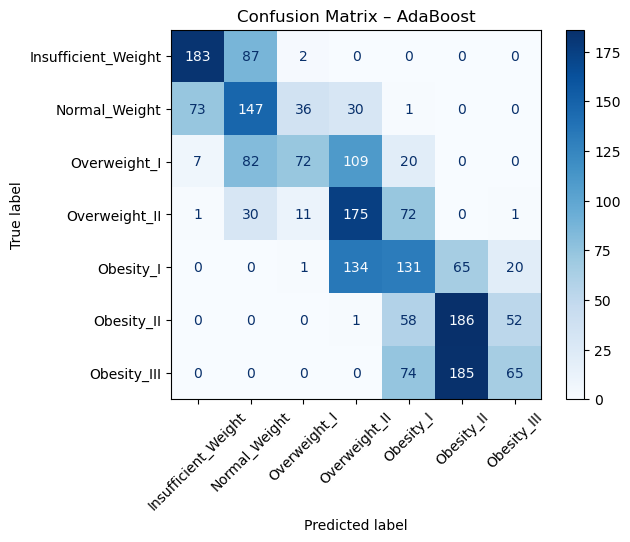


Model: RandomForest


<Figure size 1000x800 with 0 Axes>

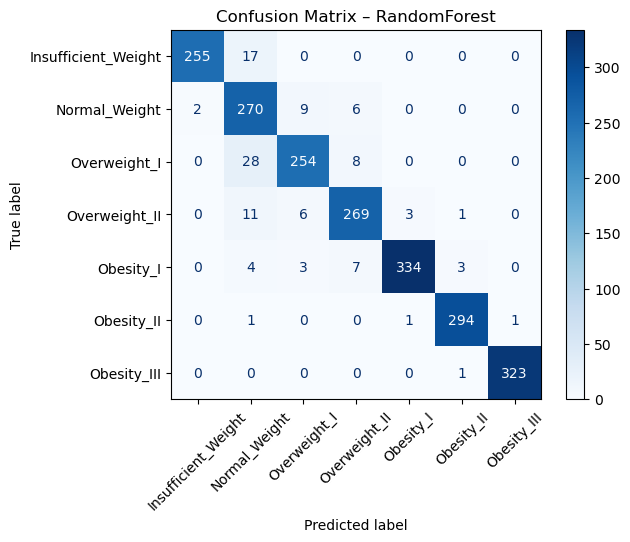


Model: HistGradientBoosting


<Figure size 1000x800 with 0 Axes>

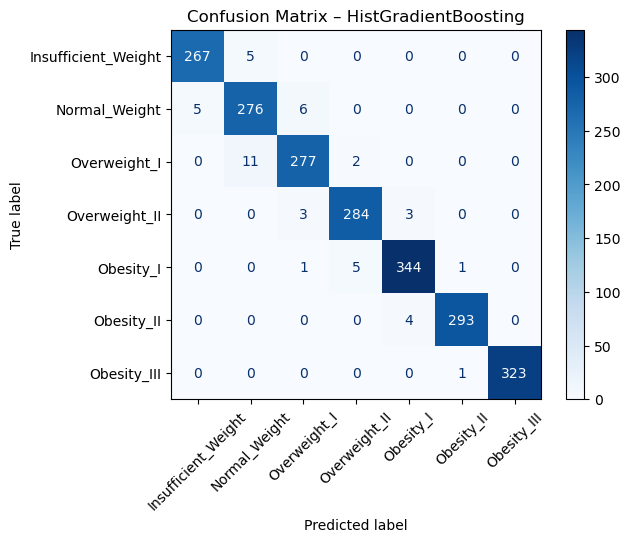

In [29]:
# Class labels for plotting the confusion matrix
labels = [
    "Insufficient_Weight", "Normal_Weight", "Overweight_I","Overweight_II", "Obesity_I", "Obesity_II", "Obesity_III"
]

# Loop through each model and print its name
models_list = ['AdaBoost', 'RandomForest', 'HistGradientBoosting']
for name in models_list:
    model = models[name]   # retrieve the model from the dict
    print("\n" + "="*60)
    print(f"Model: {name}")
    print("="*60)
    
    # Get cross-validated predictions for the entire dataset
    y_pred_cv = cross_val_predict(model, np_data, np_targets, cv=cv, n_jobs=-1)

    # Confusion matrix for this model
    cm = confusion_matrix(np_targets, y_pred_cv)
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
    plt.title(f"Confusion Matrix – {name}")
    plt.show()

### Predicting a Sample Person (Myself)

In [30]:
# Example: Predict obesity class for a custom input
myself = pd.DataFrame([{
    "Gender": "Male",
    "Age": 30,
    "Height": 1.76,
    "Weight": 101.5,
    "family_history_with_overweight": "yes",
    "FAVC": "no",
    "FCVC": 2,
    "NCP": 3,
    "CAEC": "Sometimes",
    "SMOKE": "no",
    "CH2O": 2,
    "SCC": "yes",
    "FAF": 2,
    "TUE": 1,
    "CALC": "Sometimes",
    "MTRANS": "Automobile"
}])

print(myself.shape)      # should be (1, 16)
print(myself.columns)    # must match feature_cols

(1, 16)
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')


In [31]:
# Fit the preprocessing pipeline on the training data (X_raw)
# learns encoding categories, one-hot structure, etc.
preprocess.fit(X_raw)

ColumnTransformer(transformers=[('ord',
                                 OrdinalEncoder(categories=[['no', 'Sometimes',
                                                             'Frequently',
                                                             'Always'],
                                                            ['no', 'Sometimes',
                                                             'Frequently',
                                                             'Always']],
                                                dtype=<class 'int'>),
                                 ['CAEC', 'CALC']),
                                ('onehot', OneHotEncoder(),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'SMOKE', 'SCC', 'MTRANS']),
                                ('num', 'passthrough',
                                 ['Age', 'Height', 'Weight', 'FCVC', 'NCP',
                                  'CH2O', 'FAF', 'TUE'])])

In [32]:
# Transform the custom input using the same preprocessing steps
preprocess.transform(myself)

array([[  1.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,   1.  ,   0.  ,
          1.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ,
          0.  ,  30.  ,   1.76, 101.5 ,   2.  ,   3.  ,   2.  ,   2.  ,
          1.  ]])

In [33]:
# Fit the HistGradientBoosting classifier using the fully preprocessed training data
models['HistGradientBoosting'].fit(X,y)

HistGradientBoostingClassifier(random_state=42)

In [34]:
# Save the trained classifier for prediction
trained_classifier = models['HistGradientBoosting'].fit(X,y)

In [35]:
# Predict the class for the custom person (myself)
prediction = trained_classifier.predict(preprocess.transform(myself))

In [36]:
# Convert numeric class back into original textual class name
le.inverse_transform(prediction)

array(['Overweight_Level_I'], dtype=object)